# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

###### 1. Data Exploration and Preprocessing:
•	Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).
•	Handle missing values as per the best practices (imputation, removal, etc.).
•	Apply scaling techniques to numerical features:
•	Standard Scaling
•	Min-Max Scaling
•	Discuss the scenarios where each scaling technique is preferred and why.

###### 2. Encoding Techniques:
•	Apply One-Hot Encoding to categorical variables with less than 5 categories.
•	Use Label Encoding for categorical variables with more than 5 categories.
•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.



###### 3. Feature Engineering:
•	Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.
•	Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.



###### 4. Feature Selection:
•	Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.
•	Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts
import scipy as sci
# importing basics libraries

In [2]:
data= pd.read_csv('adult_with_headers.csv') # loading data

In [3]:
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df= data.copy() # backup for data

In [5]:
df.shape #it will show number of rows and columns

(32561, 15)

In [6]:
df.head(5) # will give 1st five rows

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.tail(5) # will show last five rows

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.describe() # short info about data

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.info

<bound method DataFrame.info of        age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   

# DATA PREPROCESSING
### Identifing Null Values & Duplicate values

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [11]:
#There is no missing value in above given data

In [12]:
df.duplicated().sum()

24

In [13]:
#Remove duplicate rows
df_no_duplicates = df.drop_duplicates()

### Identifying Outliers

<Axes: >

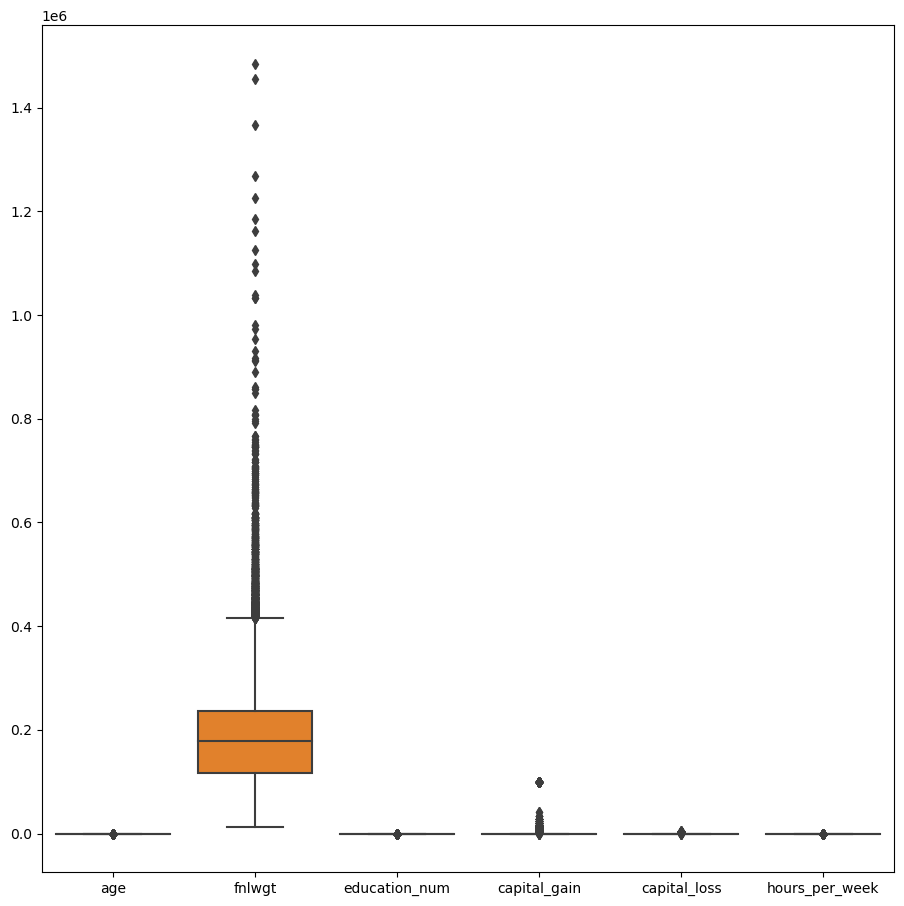

In [14]:
plt.figure(figsize=(11,11))
sns.boxplot(df)

# Removing Outliers

In [18]:

# Calculate mean and standard deviation
mean = np.mean(df['fnlwgt'])
std_dev = np.std(df['fnlwgt'])

# Calculate z-scores
df['Z-Score'] = (df['fnlwgt'] - mean) / std_dev

# Define the threshold for outliers
threshold = 3

# Filter out the outliers
df_no_outliers = df[np.abs(df['Z-Score']) <= threshold]

# Drop the Z-Score column as it's no longer needed
df_no_outliers = df_no_outliers.drop(columns=['Z-Score'])

print("Original Data:\n", df)
print("\nData without Outliers:\n", df_no_outliers)


Original Data:
        fnlwgt   Z-Score
0       77516 -1.063611
1       83311 -1.008707
2      215646  0.245079
3      234721  0.425801
4      338409  1.408176
...       ...       ...
32556  257302  0.639741
32557  154374 -0.335433
32558  151910 -0.358777
32559  201490  0.110960
32560  287927  0.929893

[32561 rows x 2 columns]

Data without Outliers:
        fnlwgt
0       77516
1       83311
2      215646
3      234721
4      338409
...       ...
32556  257302
32557  154374
32558  151910
32559  201490
32560  287927

[32214 rows x 1 columns]


### Standard Scaling:

In [19]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df['Scaled Value'] = scaler.fit_transform(df[['fnlwgt']])

print("Original Data:\n", df['fnlwgt'])
print("\nScaled Data:\n", df['Scaled Value'])


Original Data:
 0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64

Scaled Data:
 0       -1.063611
1       -1.008707
2        0.245079
3        0.425801
4        1.408176
           ...   
32556    0.639741
32557   -0.335433
32558   -0.358777
32559    0.110960
32560    0.929893
Name: Scaled Value, Length: 32561, dtype: float64


Standard scaling is a critical preprocessing step in many machine learning pipelines, ensuring that models are trained on data that is balanced and comparable across different features

Standard scaling, also known as Z-score normalization, transforms the data to have a mean of 0 and a standard deviation of 1. The formula for standard scaling is:
𝑧
=
(
𝑋
−
𝜇
)
𝜎
z= 
σ
(X−μ)
​
 
where 
𝑋
X is the original value, 
𝜇
μ is the mean of the feature, and 
𝜎
σ is the standard deviation of the feature.


###### Applications:
Machine Learning Algorithms: Algorithms like 1)Support Vector Machines (SVM),
2)K-Nearest Neighbors (KNN), and linear regression that assume data is normally distributed around 0.
3)PCA: Principal Component Analysis (PCA) benefits from standard scaling as it projects data onto orthogonal axes based on variance.

### Min-Max Scaling:

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df['Scaled Value'] = scaler.fit_transform(df[['fnlwgt']])

print("Original Data:\n", df['fnlwgt'])
print("\nScaled Data:\n", df['Scaled Value'])


Original Data:
 0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64

Scaled Data:
 0        0.044302
1        0.048238
2        0.138113
3        0.151068
4        0.221488
           ...   
32556    0.166404
32557    0.096500
32558    0.094827
32559    0.128499
32560    0.187203
Name: Scaled Value, Length: 32561, dtype: float64


Min-max scaling is a fundamental preprocessing step that enhances the performance of many machine learning algorithms by ensuring that all features contribute equally to the model.


Min-max scaling transforms the data to fit within a specified range, typically [0, 1]. The formula for min-max scaling is:
𝑋
scaled
=
(
𝑋
−
𝑋
min
)
(
𝑋
max
−
𝑋
min
)
X 
scaled
​
 = 
(X 
max
​
 −X 
min
​
 )
(X−X 
min
​
 )
​
 
where 
𝑋
X is the original value, 
𝑋
min
X 
min
​
  is the minimum value of the feature, and 
𝑋
max
X 
max
​
  is the maximum value of the feature.
  
  
  
  
  
  
  ###### Applications:
1)Neural Networks: Neural networks often perform better with normalized data, as it helps in faster convergence during training.
2)Clustering: K-means clustering benefits from min-max scaling because it ensures that each feature contributes equally to the distance calculations.
3)Image Processing: Often used to scale pixel values between 0 and 1.

# One Hot Encoding

In [26]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical columns:", categorical_columns)

Categorical columns: []


In [29]:
# Display information about the DataFrame
df.info()

# Identify categorical columns based on unique values
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' or len(df[col].unique()) < 5]

print("Categorical columns:", categorical_columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fnlwgt        32561 non-null  int64  
 1   Z-Score       32561 non-null  float64
 2   Scaled Value  32561 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 763.3 KB
Categorical columns: []


In [30]:
# Set a threshold for the number of unique values to consider a column as categorical
threshold = 5
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' or df[col].nunique() < threshold]

print("Categorical columns:", categorical_columns)


Categorical columns: []


In [31]:
# Apply one-hot encoding to categorical columns with less than 5 categories
for col in categorical_columns:
    if df[col].nunique() < 5:
        df = pd.get_dummies(df, columns=[col], prefix=[col])

print("DataFrame after One-Hot Encoding:\n", df)


DataFrame after One-Hot Encoding:
        fnlwgt   Z-Score  Scaled Value
0       77516 -1.063611      0.044302
1       83311 -1.008707      0.048238
2      215646  0.245079      0.138113
3      234721  0.425801      0.151068
4      338409  1.408176      0.221488
...       ...       ...           ...
32556  257302  0.639741      0.166404
32557  154374 -0.335433      0.096500
32558  151910 -0.358777      0.094827
32559  201490  0.110960      0.128499
32560  287927  0.929893      0.187203

[32561 rows x 3 columns]


In [36]:
df = pd.DataFrame(data)

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['fnlwgt'])

print("Original DataFrame:")
print(df)
print("\nDataFrame after one-hot encoding:")
print(df_encoded)


Original DataFrame:
       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1  

###### One-Hot Encoding:
### Pros:

1)Maintains Independence: One-hot encoding creates binary columns, each representing a category, which preserves the independence of each category. This can be important for algorithms that assume independence of features.

2)No Assumption of Order: One-hot encoding doesn't assume any ordinal relationship between categories. It treats each category as a distinct entity, which is beneficial for categorical variables without a natural ordering.

3)Compatible with Most Algorithms: One-hot encoding is widely supported by machine learning algorithms and libraries, making it easy to implement in various contexts.

### Cons:

1)Dimensionality: One-hot encoding can significantly increase the dimensionality of the dataset, especially when dealing with categorical variables with many unique categories. This can lead to the curse of dimensionality, making computations more complex and potentially requiring more data to generalize well.

2)Sparse Representation: Since one-hot encoding creates a binary column for each category, most of the values in the resulting encoded features are zeros. This can result in a sparse representation, which might be memory-intensive and computationally inefficient for large datasets.

3)Redundancy: One-hot encoding can introduce redundancy if there is high correlation between categories. For example, if two categories are mutually exclusive, having both one-hot encoded might not add much value and can even introduce multicollinearity issues.

# Label Encoding:

In [37]:
from sklearn.preprocessing import LabelEncoder
# Create DataFrame
df = pd.DataFrame(data)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in ['fnlwgt']:
    df[col+'_encoded'] = label_encoder.fit_transform(df[col])

print("Original DataFrame:")
print(df)

# Drop original categorical columns
df = df.drop(['fnlwgt'], axis=1)

print("\nDataFrame after label encoding:")
print(df)


Original DataFrame:
       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1  

###### Label Encoding:
### Pros:

1)Compact Representation: Label encoding converts categories into integer values, resulting in a more compact representation compared to one-hot encoding. This can be beneficial when dealing with large categorical variables, as it reduces the dimensionality of the dataset.

2)Preserves Order: Label encoding can be useful for ordinal categorical variables where there is a natural order among the categories. It assigns integer values based on the order, which can capture some ordinal information.

### Cons:

1)Assumption of Order: Label encoding assumes ordinal relationships between categories, which might not always be appropriate. For nominal categorical variables without a natural order, assigning integer values can mislead the model into interpreting ordinality where none exists.

2)Potential Bias: Label encoding can introduce unintended biases, especially in algorithms that rely on distances or magnitudes of values. The assigned integer values might imply a false sense of magnitude or importance to certain categories.

3)Difficulty with Algorithms: Some machine learning algorithms might misinterpret the integer values assigned by label encoding as having some mathematical significance, leading to incorrect results. Certain algorithms might perform better with one-hot encoded variables.

### New Feature Addition

In [48]:
df = pd.DataFrame(data)

# Convert 'age' column to numeric type (if possible)
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Handle missing or NaN values (if any)
df['age'].fillna(np.nan, inplace=True)

# Check for any unexpected non-numeric values in 'age' column
unexpected_values = df[~df['age'].notnull()]['age']
if not unexpected_values.empty:
    print("Unexpected non-numeric values in 'age' column:", unexpected_values)

# Perform cut operation to create 'Age_Group' column
df['Age_Group'] = pd.cut(df['age'], bins=[0, 30, 40, np.inf], labels=['Young', 'Middle-aged', 'Old'])

print("DataFrame with new feature:")
print(df)


Unexpected non-numeric values in 'age' column: 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32556   NaN
32557   NaN
32558   NaN
32559   NaN
32560   NaN
Name: age, Length: 32561, dtype: float64
DataFrame with new feature:
       age          workclass fnlwgt    education  education_num  \
0      NaN          State-gov    Old    Bachelors             13   
1      NaN   Self-emp-not-inc    Old    Bachelors             13   
2      NaN            Private    Old      HS-grad              9   
3      NaN            Private    Old         11th              7   
4      NaN            Private    Old    Bachelors             13   
...    ...                ...    ...          ...            ...   
32556  NaN            Private    Old   Assoc-acdm             12   
32557  NaN            Private    Old      HS-grad              9   
32558  NaN            Private    Old      HS-grad              9   
32559  NaN            Private    Old      HS-grad              9   
3256

In [51]:
df = pd.DataFrame(data)

# Convert 'age' column to numeric type (if possible)
df['capital_gain'] = pd.to_numeric(df['income'], errors='coerce')

# Handle missing or NaN values (if any)
df['capital_gain'].fillna(np.nan, inplace=True)

# Check for any unexpected non-numeric values in 'age' column
unexpected_values = df[~df['capital_gain'].notnull()]['capital_gain']
if not unexpected_values.empty:
    print("Unexpected non-numeric values in 'age' column:", unexpected_values)

# Perform cut operation to create 'Age_Group' column
df['capital_gain'] = pd.cut(df['capital_gain'], bins=[1000, 30000, 40000, np.inf], labels=['FIRST', 'SECOND', 'THIRD'])

print("DataFrame with new feature:")
print(df)


Unexpected non-numeric values in 'age' column: 0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32556   NaN
32557   NaN
32558   NaN
32559   NaN
32560   NaN
Name: capital_gain, Length: 32561, dtype: float64
DataFrame with new feature:
       age          workclass fnlwgt    education  education_num  \
0      NaN          State-gov    Old    Bachelors             13   
1      NaN   Self-emp-not-inc    Old    Bachelors             13   
2      NaN            Private    Old      HS-grad              9   
3      NaN            Private    Old         11th              7   
4      NaN            Private    Old    Bachelors             13   
...    ...                ...    ...          ...            ...   
32556  NaN            Private    Old   Assoc-acdm             12   
32557  NaN            Private    Old      HS-grad              9   
32558  NaN            Private    Old      HS-grad              9   
32559  NaN            Private    Old      HS-grad              

### Isolation Forest algorithm to identify and remove outliers

In [62]:
from sklearn.ensemble import IsolationForest

In [75]:
X = df[['hours_per_week']]  # Select relevant features from your DataFrame

In [76]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)  # Example contamination level
clf.fit(X)



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [77]:
outliers = clf.predict(X)
#Use the predict method of the Isolation Forest model to predict outliers in your dataset.

In [79]:
X_clean = X[outliers != -1]
#emove the outliers from your dataset based on the predictions. You can filter out the outliers by selecting 
#only the data points that are not classified as outliers.


Outliers can significantly affect the performance of machine learning models in various ways:

Overall, outliers can have a detrimental impact on the performance and reliability of machine learning models. It's essential to identify and handle outliers appropriately during the data preprocessing stage to ensure that models are trained on high-quality, representative data. Techniques such as outlier detection, removal, or robust modeling approaches can help mitigate the effects of outliers and improve model performance

### PPS (Predictive Power Score)

In [88]:
import ppscore as pps
pps_matrix = pps.matrix(df)
warnings.filterwarnings("ignore", category=DeprecationWarning)


C:\Users\Admin\anaconda3\lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in double_scalars
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\s

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\ppscore\calculation.py:104: RuntimeWarning: invalid value encountered in double_scalars
  return f1_diff / scale_range  # 0.1/0.3 = 0.33
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\s

NameError: name 'warnings' is not defined

In [ ]:
pps_matrix = pps.matrix(df)
#Use the ppscore.matrix function to calculate the PPS matrix for all pairs of variables in your dataset. 
#This will provide a comprehensive view of the
#predictive power between each pair of features.

In [89]:
correlation_matrix = df.corr()

#Compare with Correlation Matrix:

C:\Users\Admin\AppData\Local\Temp\ipykernel_7692\1651158645.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


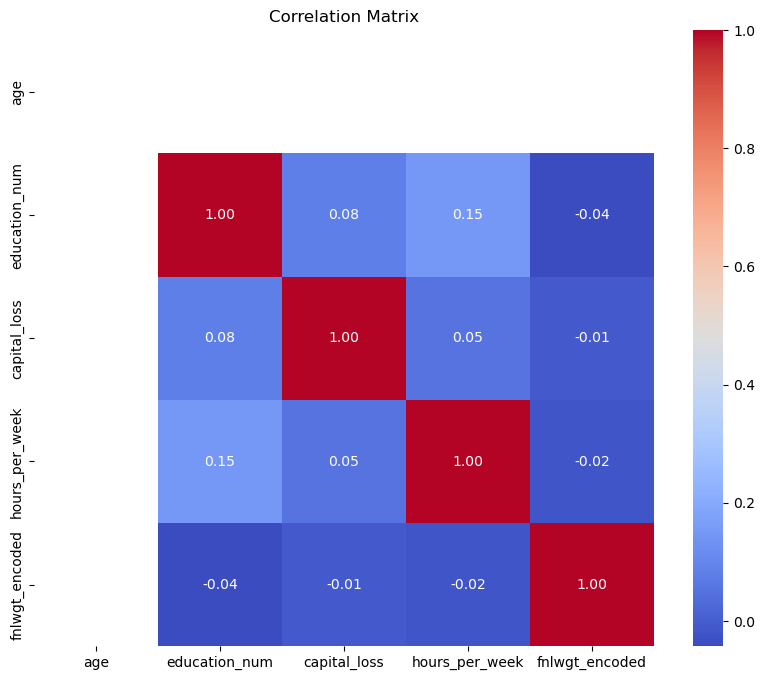

In [90]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


#Visualize the correlation matrix:

By comparing the findings from the PPS matrix with the correlation matrix, you can gain a more comprehensive understanding of the relationships between features in your dataset. PPS can be particularly useful for identifying non-linear relationships and dependencies that may be overlooked by traditional correlation measures.